In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [4]:
jan_data = pd.read_parquet('data/fhv_tripdata_2021-01.parquet')
feb_data = pd.read_parquet('data/fhv_tripdata_2021-02.parquet')

In [5]:
jan_data.size

8078784

In [6]:
jan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [7]:
jan_data["duration"] = jan_data.dropOff_datetime - jan_data.pickup_datetime

In [23]:
td = jan_data.duration[0]

In [24]:
td

Timedelta('0 days 00:17:00')

In [21]:
val = td.total_seconds() / 60

In [22]:
val

17.0

In [8]:
jan_data["duration_in_min"] = jan_data.duration.apply(lambda td : td.total_seconds()/60 )

In [30]:
jan_data.info()
# 1154112

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype          
---  ------                  --------------    -----          
 0   dispatching_base_num    1154112 non-null  object         
 1   pickup_datetime         1154112 non-null  datetime64[ns] 
 2   dropOff_datetime        1154112 non-null  datetime64[ns] 
 3   PUlocationID            195845 non-null   float64        
 4   DOlocationID            991892 non-null   float64        
 5   SR_Flag                 0 non-null        object         
 6   Affiliated_base_number  1153227 non-null  object         
 7   duration                1154112 non-null  timedelta64[ns]
 8   duration_in_min         1154112 non-null  float64        
dtypes: datetime64[ns](2), float64(3), object(3), timedelta64[ns](1)
memory usage: 79.2+ MB


In [32]:
jan_data.duration_in_min.mean()

19.167224093791006

D:\ADBC techlabs\DataTalksClub\mlops-zoomcamp\mlops-zoomcamp-venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_in_min', ylabel='Density'>

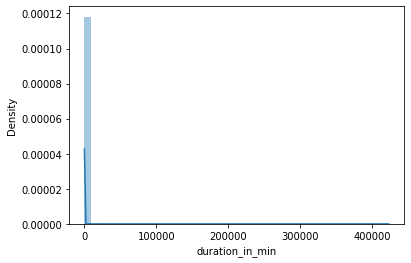

In [10]:
sns.distplot(jan_data.duration_in_min)

In [11]:
jan_data = jan_data[(jan_data.duration_in_min >= 1) & (jan_data.duration_in_min <= 60)]

In [12]:
jan_data.info()
# 1109826

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype          
---  ------                  --------------    -----          
 0   dispatching_base_num    1109826 non-null  object         
 1   pickup_datetime         1109826 non-null  datetime64[ns] 
 2   dropOff_datetime        1109826 non-null  datetime64[ns] 
 3   PUlocationID            182818 non-null   float64        
 4   DOlocationID            961919 non-null   float64        
 5   SR_Flag                 0 non-null        object         
 6   Affiliated_base_number  1109053 non-null  object         
 7   duration                1109826 non-null  timedelta64[ns]
 8   duration_in_min         1109826 non-null  float64        
dtypes: datetime64[ns](2), float64(3), object(3), timedelta64[ns](1)
memory usage: 84.7+ MB


In [13]:
# number of records dropped :
1154112 - 1109826

44286

In [14]:
Total_na_values = jan_data.PUlocationID.isna().sum()
Total_na_values

927008

In [15]:
Total_not_na_values = jan_data.PUlocationID.notna().sum()
Total_not_na_values

182818

In [16]:
fraction_missing = Total_na_values/(Total_na_values + Total_not_na_values)
fraction_missing

0.8352732770722617

In [17]:
categorical = ['PUlocationID', 'DOlocationID']
jan_data[categorical] = jan_data[categorical].fillna(value = -1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17328\3138894846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_data[categorical] = jan_data[categorical].fillna(value = -1)


In [19]:
jan_data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,duration_in_min
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,0 days 00:17:00,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,0 days 00:17:00,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,0 days 00:08:17,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,0 days 00:15:13,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,0 days 00:09:03,9.050000


In [20]:
jan_data[categorical] = jan_data[categorical].astype(str)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17328\1042393127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_data[categorical] = jan_data[categorical].astype(str)


In [21]:
train_dicts = jan_data[categorical].to_dict(orient='records')

In [22]:
train_dicts

[{'PUlocationID': '-1.0', 'DOlocationID': '-1.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '-1.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '71.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '91.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '37.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '89.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '177.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '225.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '63.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '67.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '22.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1.0', 'DOlocationID': '14.0'},
 {'PUlocationID': '-1.0', 'DO

In [23]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [24]:
X_train.get_shape()

(1109826, 525)

In [25]:
# X_train.data.shape
# X_train.data.shape
X_train.shape

(1109826, 525)

In [26]:
target = "duration_in_min"
Y_train = jan_data[target].values

In [27]:
lr = LinearRegression()
_ = lr.fit(X_train, Y_train)

In [28]:
y_pred = lr.predict(X_train)

In [29]:
y_pred

array([23.05209154, 23.05209154, 14.10577354, ..., 16.61312133,
       11.13686086, 23.05209154])

In [30]:
Y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [31]:
rmse = mean_squared_error(Y_train, y_pred, squared=False)
rmse

10.528519425310185

In [32]:
mse = mean_squared_error(Y_train, y_pred, squared=True)
mse

110.84972128913391

In [33]:
feb_data["duration"] = feb_data.dropOff_datetime - feb_data.pickup_datetime

feb_data["duration_in_min"] = feb_data.duration.apply(lambda td : td.total_seconds()/60 )

feb_data = feb_data[(feb_data.duration_in_min >= 1) & (feb_data.duration_in_min <= 60)]

categorical = ['PUlocationID', 'DOlocationID']
feb_data[categorical] = feb_data[categorical].fillna(value = -1)

feb_data[categorical] = feb_data[categorical].astype(str)
validation_dicts = feb_data[categorical].to_dict(orient='records')

X_validation = dv.transform(validation_dicts)
Y_validation = feb_data[target].values

y_valid_pred = lr.predict(X_validation)

rmse = mean_squared_error(Y_validation, y_valid_pred, squared=False)
rmse

11.014285828610237